In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)/'images'

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path),
    valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
   item_tfms=Resize(128))

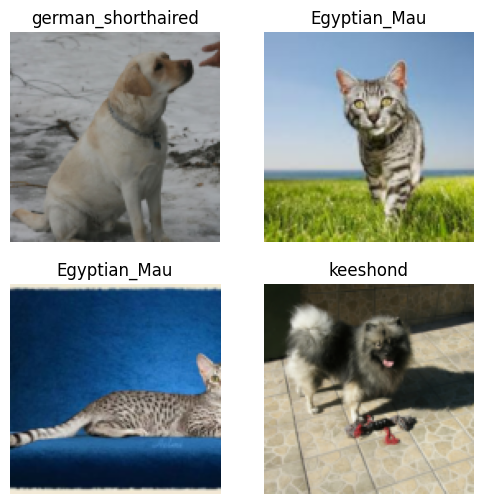

In [6]:
dls.show_batch(max_n=4)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,2.308917,0.892947,0.269283,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.963194,0.657400,0.201624,00:21
1,0.619618,0.556464,0.177943,00:21
2,0.378425,0.556659,0.175237,00:21


In [11]:
import timm
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [13]:
learn = vision_learner(dls, 'convnext_tiny_hnf', metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.093684,0.412459,0.120433,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.403197,0.348199,0.103518,00:23
1,0.297896,0.288926,0.081867,00:23
2,0.195285,0.269451,0.075101,00:24


In [14]:
learn.export('Breedmodel.pkl')